In [1]:
import sys
sys.path.append('/home/youzhi/python-projects/sp-project/code')

In [2]:
import torch 
import os
import PmPNet as PN

# Device configuration
cuda = torch.cuda.is_available()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
batch_size = 200
num_epochs = 80
learning_rate = 1e-3

# Paths for different folders, data and result folders
datadir="/home/youzhi/python-projects/sp-project/Data"
wdir="Train_PN_result"
if not os.path.exists(wdir):
    os.makedirs(wdir)

# Train PmPNet

We train (80%) and validate (20%) PmPNet on 5,000 waveform data with clear 
PmP waves and 100,000 waveform data without clear PmP waves.

In [3]:
# read in the training data 
train_loader, test_loader = PN.readin_data_train(datadir,"TrainData_PmP_Net",batch_size)

In [4]:
# train PmPNet
PN.NetTrain(wdir,"train_PN_log","net_PN_model",train_loader,learning_rate,num_epochs,batch_size,device)

encode:
torch.Size([200, 128, 297])
torch.Size([200, 128, 148])
torch.Size([200, 128, 148])
torch.Size([200, 128, 49])
torch.Size([200, 128, 49])
torch.Size([200, 128, 16])
torch.Size([200, 64, 16])
torch.Size([200, 64, 15])
torch.Size([200, 128, 7])
encode:
torch.Size([200, 128, 297])
torch.Size([200, 128, 148])
torch.Size([200, 128, 148])
torch.Size([200, 128, 49])
torch.Size([200, 128, 49])
torch.Size([200, 128, 16])
torch.Size([200, 64, 16])
torch.Size([200, 64, 15])
torch.Size([200, 128, 7])
decode:
torch.Size([200, 64, 26])
torch.Size([200, 64, 26])
torch.Size([200, 64, 26])
torch.Size([200, 64, 26])
torch.Size([200, 64, 100])
torch.Size([200, 1, 297])


KeyboardInterrupt: 

In [4]:
# model evaluation on test data
PN.netevalu(wdir,"net_PN_model","prcurve_file","predict_PN_file",test_loader,device)

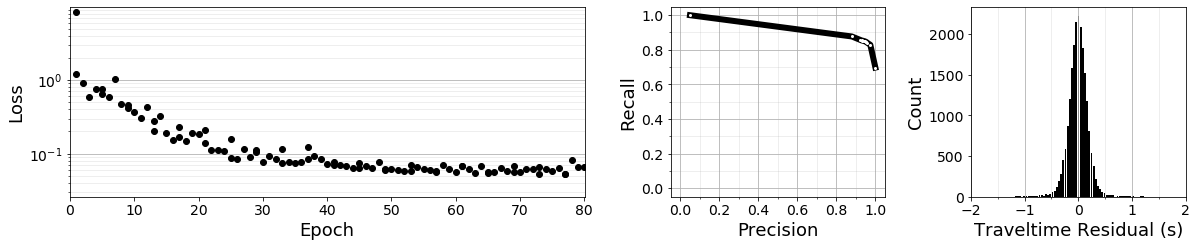

In [5]:
# quickly visualize the result
PN.plot_modeva(wdir,"train_PN_log","prcurve_file","predict_PN_file","plot_PN_modevalu")

# Apply pre-trained PmPNet to identify PmP phase on real data

### Applied to a certain year

In [10]:
# read in the real data 
test_loader = PN.readin_data_real(datadir,"ValidationData_2015",batch_size)

In [11]:
PN.netpredict(datadir,"ValidationData_2015",wdir,"net_PN_model","predict_PN_file_2015",test_loader,device)

NO.: 0   ID: 37272439   PmP_Prob: 0.323879  PmP_Time: 20.893116  dist: 127.9   evdp: 11.59   mag: 2.1  evtnm: 20151113_1204.CI.DTP
NO.: 1   ID: 37198399   PmP_Prob: 0.000000  PmP_Time: 17.361309  dist: 103.3   evdp: 18.04   mag: 2.3  evtnm: 20150705_1315.CI.SYN
NO.: 2   ID: 37150703   PmP_Prob: 0.000001  PmP_Time: 14.302899  dist: 76.6   evdp: 6.28   mag: 2.4  evtnm: 20150423_1454.CI.TOR
NO.: 3   ID: 37501608   PmP_Prob: 0.000037  PmP_Time: 13.073999  dist: 60.6   evdp: 2.31   mag: 2.2  evtnm: 20151214_0708.CI.DPP
NO.: 4   ID: 37508080   PmP_Prob: 0.000002  PmP_Time: 19.669258  dist: 111.8   evdp: 2.76   mag: 2.3  evtnm: 20151230_1027.CI.JVA
NO.: 5   ID: 37148391   PmP_Prob: 0.000000  PmP_Time: 16.840071  dist: 91.2   evdp: -0.18   mag: 2.3  evtnm: 20150420_0231.CI.HEC
NO.: 6   ID: 37305208   PmP_Prob: 0.000026  PmP_Time: 24.993418  dist: 151.4   evdp: 6.62   mag: 2.5  evtnm: 20150114_1203.CI.SYP
NO.: 7   ID: 37301936   PmP_Prob: 0.000000  PmP_Time: 26.983143  dist: 170.9   evdp: 8.30 

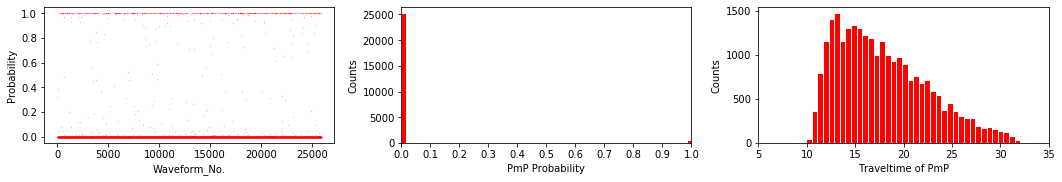

In [2]:
PN.plot_modpredict(wdir,"predict_PN_file_2015","plot_PN_predict2015")